# Prueba 4: Duración procesamiento de archivo

## Inicialización FPGA

In [6]:
# Librería PYNQ
from pynq import Overlay, allocate
# Estructuras de datos y gráficos
import numpy as np
import matplotlib.pyplot as plt
# Librería MIDI
from mido import Message, MidiFile, MidiTrack, second2tick
# Librería lectura y creación de archivos de audio
from scipy.io import wavfile

In [7]:
# Controladores bloques de procesamiento
%run FFT_DMA_Driver.ipynb
%run Audio_DMA_Driver.ipynb
# Cargar Overlay FFT 
ol = Overlay('/home/xilinx/pynq/overlays/fft/disenofinal.bit')
# Inicializar DMAs, para enviar y recibir datos y configuración
fft = ol.fft_block
audio = ol.audio_block

In [8]:
# Inicialización parámetros y funciones
BLOCK_SIZE = 1024
audio.configure(BLOCK_SIZE)

# Buffer de entrada para DMA
input_buffer_audio = allocate(shape=(BLOCK_SIZE,), dtype=np.int32)

# Función para recibir el Audio Procesado
def apply_effects(input_data):
    np.copyto(input_buffer_audio, input_data.astype(np.int32))
    return audio.apply_effects(input_buffer_audio)

audio.gain_set_gain(8)
audio.rect_set_enable(1)
audio.clip_set_threshold(0.4)

## Carga de archivo 1

In [26]:
# Cargar archivo de audio
SAMPLE_RATE, audio_data = wavfile.read("archivo1.wav")
print("Sample Rate: " + str(SAMPLE_RATE))

# Convertir a mono si es necesario
if len(audio_data.shape) > 1:
    audio_data = np.mean(audio_data, axis=1)

# Asegurarse de que el audio esté en formato int32
audio_data = (audio_data * np.iinfo(np.int32).max).astype(np.int32)

Sample Rate: 44100


/usr/lib/python3/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


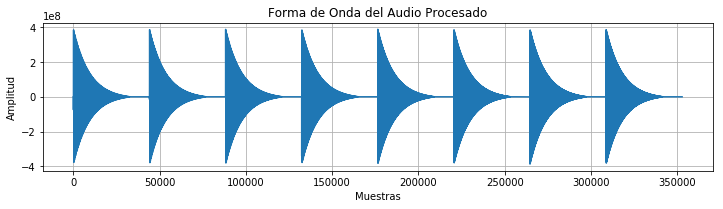

In [10]:
# Gráfica forma de onda
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title("Forma de Onda del Audio Procesado")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

### Procesamiento Archivo 1

In [33]:
%%time
# Procesar el audio
audio_results = []

block = np.zeros(BLOCK_SIZE, dtype=np.int32)

# Dividir el audio en bloques y aplicar efectos
for start in range(0, len(audio_data), BLOCK_SIZE):
    end = start + BLOCK_SIZE
    if end > len(audio_data):    
        block[:len(audio_data) - start] = audio_data[start:]
    else:
        block = audio_data[start:end].astype(np.int32)
    
    # Aplicar efectos (por ejemplo, ganancia) a los datos
    res_audio = apply_effects(block)
    
    # Imprimir los pares block - res_audio
    #print(f"Pares block - res_audio para el bloque {start//BLOCK_SIZE}:")
    #for idx, (original, processed) in enumerate(zip(block[:20], res_audio[:20])):
    #    print(f"Índice: {idx}, Original: {original}, Procesado: {processed}")
    
    audio_results.append(np.copy(res_audio))

CPU times: user 217 ms, sys: 0 ns, total: 217 ms
Wall time: 217 ms


## Carga de archivo 2

In [19]:
# Cargar archivo de audio
SAMPLE_RATE, audio_data = wavfile.read("archivo2.wav")
print("Sample Rate: " + str(SAMPLE_RATE))

# Convertir a mono si es necesario
if len(audio_data.shape) > 1:
    audio_data = np.mean(audio_data, axis=1)

# Asegurarse de que el audio esté en formato int32
audio_data = (audio_data * np.iinfo(np.int32).max).astype(np.int32)

Sample Rate: 44100


/usr/lib/python3/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


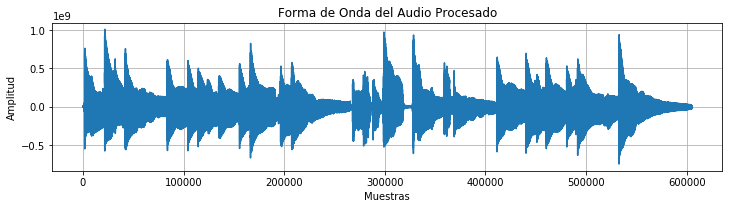

In [13]:
# Gráfica forma de onda
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title("Forma de Onda del Audio Procesado")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

### Procesamiento Archivo 2

In [25]:
%%time
# Procesar el audio
audio_results = []

block = np.zeros(BLOCK_SIZE, dtype=np.int32)

# Dividir el audio en bloques y aplicar efectos
for start in range(0, len(audio_data), BLOCK_SIZE):
    end = start + BLOCK_SIZE
    if end > len(audio_data):    
        block[:len(audio_data) - start] = audio_data[start:]
    else:
        block = audio_data[start:end].astype(np.int32)
    
    # Aplicar efectos (por ejemplo, ganancia) a los datos
    res_audio = apply_effects(block)
    
    # Imprimir los pares block - res_audio
    #print(f"Pares block - res_audio para el bloque {start//BLOCK_SIZE}:")
    #for idx, (original, processed) in enumerate(zip(block[:20], res_audio[:20])):
    #    print(f"Índice: {idx}, Original: {original}, Procesado: {processed}")
    
    audio_results.append(np.copy(res_audio))

CPU times: user 371 ms, sys: 0 ns, total: 371 ms
Wall time: 372 ms
